Nombres:


*   Imanol Mendoza Saenz de Buruaga
*   Villalon Pineda Luis Enrique

Mirzakhani

# Ejercicio 3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [ ]:
cr = '/content/cars.csv'
cars = pd.read_csv(cr)
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## a)

In [ ]:
half_cars = cars.iloc[:len(cars) // 2].drop(columns=['class'])
encoder = LabelEncoder()
encoded_cars = half_cars.apply(encoder.fit_transform)

linked = linkage(encoded_cars, method='ward')

El enlace Ward es el que mejor se ajusta a los datos, pues con este podemos ver de manera clara el número de grupos óptimos.

## b)

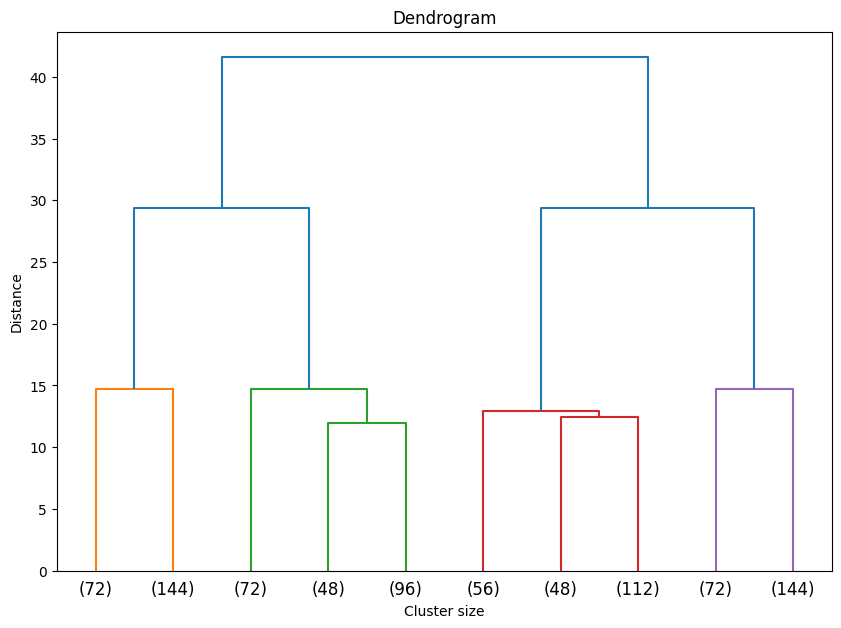

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(linked, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

## c)

In [ ]:
clusters = 4
clusters = fcluster(linked, clusters, criterion='maxclust')
half_cars['Cluster'] = clusters
half_cars.head()

,buying,maint,doors,persons,lug_boot,safety,Cluster
0,vhigh,vhigh,2,2,small,low,3
1,vhigh,vhigh,2,2,small,med,3
2,vhigh,vhigh,2,2,small,high,3
3,vhigh,vhigh,2,2,med,low,3
4,vhigh,vhigh,2,2,med,med,3


## d)

In [ ]:
from inspect import classify_class_attrs
class_cars = cars.iloc[:len(cars) // 2]['class']
num_classes = class_cars.nunique()

kmeans = KMeans(n_clusters=num_classes, random_state=42)
kmeans_clusters = kmeans.fit_predict(encoded_cars)

cluster_to_class = {}
for cluster in set(kmeans_clusters):
    indices = [i for i in range(len(kmeans_clusters)) if kmeans_clusters[i] == cluster]
    majority_class = class_cars.iloc[indices].mode()[0]
    cluster_to_class[cluster] = majority_class

cars_df = cars.iloc[:len(cars) // 2].copy()
cars_df['Predicted_class'] = [cluster_to_class[cluster] for cluster in kmeans_clusters]
cars

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## e)

In [ ]:
predicted_classes_cars = [cluster_to_class[cluster] for cluster in kmeans_clusters]
accuracy = accuracy_score(class_cars, predicted_classes_cars)
accuracy, num_classes

(0.7916666666666666, 2)

# Ejercicio 5

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## a)

In [141]:
train_data = pd.read_csv('/content/train (2).csv', delimiter=';')
test_data = pd.read_csv('/content/test (1).csv', delimiter=';')
evaluation_data = pd.read_csv('/content/evaluation.csv', delimiter=';')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']
X_eval = evaluation_data['text']
y_eval = evaluation_data['label']
#Vectorice el texto, para que lo ´pueda leer el modelo
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_eval_vec = vectorizer.transform(X_eval)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
mby = MultinomialNB()
mby.fit(X_train_vec, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MultinomialNB()

In [150]:
y_test_pred = mby.predict(X_test_vec)
y_eval_pred = mby.predict(X_eval_vec)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## b)

In [163]:
#En classification_report ya vienen todas las metricas
test_mby = classification_report(y_test, y_test_pred)
eval_mby = classification_report(y_eval, y_eval_pred)

print(test_mby)
print(eval_mby)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3753
           1       0.95      0.95      0.95      4364

    accuracy                           0.94      8117
   macro avg       0.94      0.94      0.94      8117
weighted avg       0.94      0.94      0.94      8117

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3803
           1       0.94      0.94      0.94      4314

    accuracy                           0.94      8117
   macro avg       0.94      0.94      0.94      8117
weighted avg       0.94      0.94      0.94      8117



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## c)

In [159]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_vec, y_train)
y_test_pred_xgb = xgb_model.predict(X_test_vec)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:33:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [164]:
test_xgb = classification_report(y_test, y_test_pred_xgb)
eval_xgb = classification_report(y_eval, y_test_pred_xgb)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [166]:
print('XGB')
print(test_xgb)
print(eval_xgb)
print('MNB')
print(test_mby)
print(eval_mby)

XGB
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3753
           1       0.99      0.98      0.99      4364

    accuracy                           0.99      8117
   macro avg       0.99      0.99      0.99      8117
weighted avg       0.99      0.99      0.99      8117

              precision    recall  f1-score   support

           0       0.47      0.46      0.46      3803
           1       0.53      0.53      0.53      4314

    accuracy                           0.50      8117
   macro avg       0.50      0.50      0.50      8117
weighted avg       0.50      0.50      0.50      8117

MNB
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3753
           1       0.95      0.95      0.95      4364

    accuracy                           0.94      8117
   macro avg       0.94      0.94      0.94      8117
weighted avg       0.94      0.94      0.94      8117

           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Ejercicio 6

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
with open('/content/groceriesx (1).csv', 'r') as file: # Esta como groceriesx (1) lo descarge dos veces en la compu y lo subi asi , pero son los mismos datos
    lines = file.readlines()

transactions = [line.strip().split(',') for line in lines[1:]]
transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [133]:
frequent_itemsets = apriori(transaction_df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=frequent_items.shape[0])
rules_sorted = rules.sort_values(by="lift", ascending=False)
support = transaction_df.mean(axis=0)
min_support = 0.0001
frequent_items = support[support >= min_support]

pairwise_support = transaction_df.T.dot(transaction_df) / len(transaction_df)

rules = pairwise_support.loc[
    frequent_items.index, frequent_items.index
].stack().reset_index()

rules.columns = ['Antecedent', 'Consequent', 'Support']

rules = rules[rules['Antecedent'] != rules['Consequent']]

rules_sorted = rules.sort_values(by='Support', ascending=False)

rules_sorted.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Antecedent,Consequent,Support
1,Instant food products,UHT-milk,0.000102
17568,organic products,root vegetables,0.000102
17566,organic products,roll products,0.000102
17564,organic products,rice,0.000102
17556,organic products,pot plants,0.000102


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


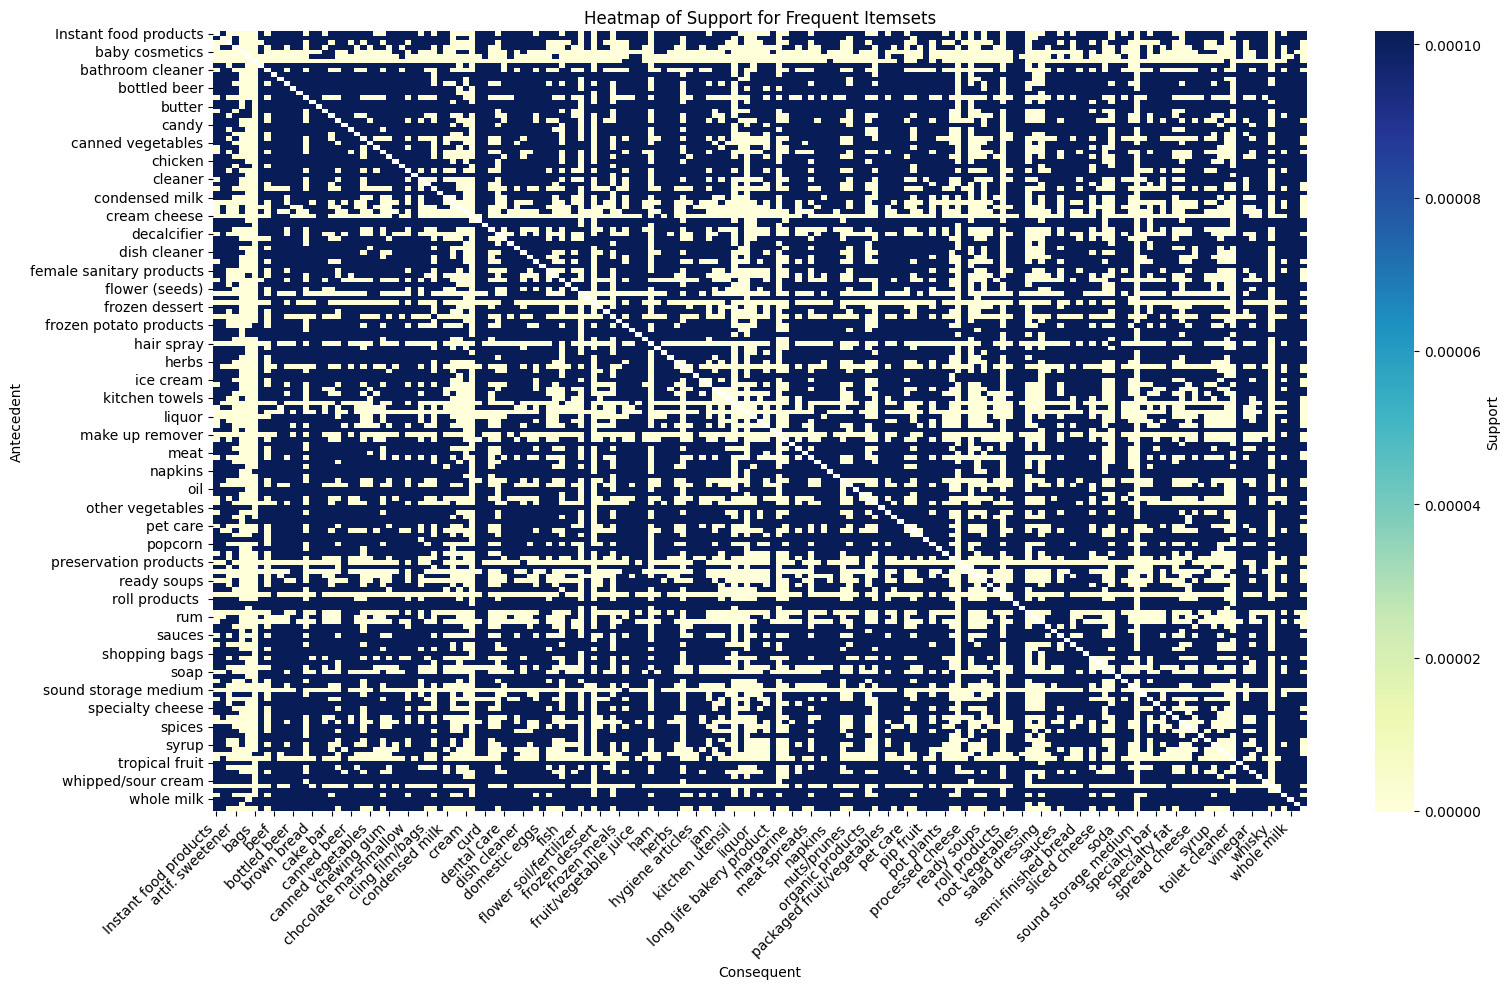

In [134]:
heatmap_data = rules_sorted.pivot(index="Antecedent", columns="Consequent", values="Support")

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu", cbar_kws={'label': 'Support'})
plt.title("Heatmap of Support for Frequent Itemsets")
plt.xlabel("Consequent")
plt.ylabel("Antecedent")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Ejercicio 8

Elige al menos dos de los ejercicios previos y crea pipelines que realicen los pasos necesarios para realizar validación cruzada anidada para comparar al menos dos modelos de aprendizaje con el preprocesamiento necesario y elegir aquel que tenga el mejor rendimiento
(20p)
Nota: Dentro de las pipelines deben estar todas las operaciones que implementan el método fit.

### Ejercicio1(Del ejerccio 5)

In [167]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
pipeline_nb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

pipeline_xgb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])
# Validacion Cruzada anidada
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_nb = cross_val_score(pipeline_nb, X_train, y_train, cv=outer_cv, scoring='f1_weighted')
scores_xgb = cross_val_score(pipeline_xgb, X_train, y_train, cv=outer_cv, scoring='f1_weighted')

results = {
    "Multinomial Naive Bayes (F1 Score)": scores_nb.mean(),
    "XGBoost (F1 Score)": scores_xgb.mean()
}

results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:48:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:48:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/loca

{'Multinomial Naive Bayes (F1 Score)': 0.9336034764535326,
 'XGBoost (F1 Score)': 0.9832970872565694}

## Ejercicio2(Ejercicio 4)

In [170]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
bh = pd.read_csv('/content/user_behavior_dataset.csv', index_col=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [172]:
# Convertir clasificaciones categóricas a números
df_features = pd.DataFrame()
for columna in bh.columns:
    datos_c = bh[columna]
    if datos_c.dtype != np.int64:
        unique_values = datos_c.unique()
        mapping = {valor: indice for indice, valor in enumerate(unique_values)}
        df_features[columna] = datos_c.map(mapping)
    else:
        df_features[columna] = datos_c

# Separar características y objetivo
X = df_features.drop(columns=["Operating System"])
y = df_features["Operating System"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
# Validación cruzada anidada
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

pipeline_xgb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

scorer = make_scorer(f1_score, average='weighted')

# Comparacion de Modelos
models = {
    'KNeighbors': pipeline_knn,
    'XGBoost': pipeline_xgb
}

for model_name, model_pipeline in models.items():
    scores = cross_val_score(model_pipeline, X, y, cv=outer_cv, scoring=scorer)
    print(f"{model_name} - Mean F1 Score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


KNeighbors - Mean F1 Score: 0.8395 ± 0.0570


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Mean F1 Score: 1.0000 ± 0.0000


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
